In [59]:
import sys
sys.path.append("..")


In [60]:
import tensorflow as tf
import keras, keras.layers as L, keras.backend as K
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [63]:
from keras.preprocessing import image

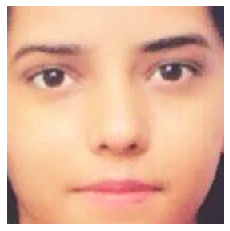

In [64]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Loading images to train the autoencoder

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

folder="/content/drive/My Drive/all_pix"

CX = load_images_from_folder(folder)
CX = np.array(CX)
plt.axis("off")
plt.imshow(cv2.cvtColor(CX[60], cv2.COLOR_BGR2RGB))
plt.show()

In [65]:
IMG_SHAPE = CX.shape[1:]

# center images
CX = CX.astype('float32') / 255.0 - 0.5

CX shape: (88, 218, 217, 3)


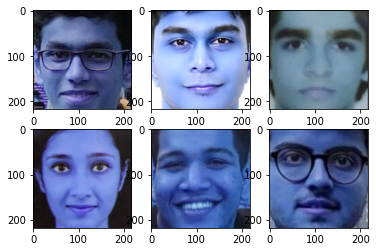

In [66]:
plt.title('sample images')

for i in range(6):
    plt.subplot(2,3,i+1)
    show_image(CX[i])

print("CX shape:", CX.shape)

In [67]:
from sklearn.model_selection import train_test_split
CX_train, CX_test = train_test_split(CX, test_size=0.1, random_state=42)

In [68]:
def show_image(x):
    plt.imshow(np.clip(x + 0.5, 0, 1))

In [69]:
from keras.layers import Dense, Flatten, Reshape, Input, InputLayer
from keras.models import Sequential, Model

def build_autoencoder(img_shape, code_size):
    # The encoder
    encoder = Sequential()
    encoder.add(InputLayer(img_shape))
    encoder.add(Flatten())
    encoder.add(Dense(code_size))

    # The decoder
    decoder = Sequential()
    decoder.add(InputLayer((code_size,)))
    decoder.add(Dense(np.prod(img_shape))) 
    decoder.add(Reshape(img_shape))

    return encoder, decoder

In [70]:
encoder, decoder = build_autoencoder(IMG_SHAPE, code_size=32)

inp = L.Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

autoencoder = keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer='adamax', loss='mse')

history = autoencoder.fit(x=CX_train, y=CX_train, epochs=15,
                validation_data=[CX_test])

Epoch 1/15
3/3 [==============================] - 1s 129ms/step - loss: 0.0980 - val_loss: 0.0000e+00
Epoch 2/15
3/3 [==============================] - 0s 93ms/step - loss: 0.0602 - val_loss: 0.0000e+00
Epoch 3/15
3/3 [==============================] - 0s 90ms/step - loss: 0.0525 - val_loss: 0.0000e+00
Epoch 4/15
3/3 [==============================] - 0s 98ms/step - loss: 0.0353 - val_loss: 0.0000e+00
Epoch 5/15
3/3 [==============================] - 0s 99ms/step - loss: 0.0340 - val_loss: 0.0000e+00
Epoch 6/15
3/3 [==============================] - 0s 94ms/step - loss: 0.0298 - val_loss: 0.0000e+00
Epoch 7/15
3/3 [==============================] - 0s 85ms/step - loss: 0.0276 - val_loss: 0.0000e+00
Epoch 8/15
3/3 [==============================] - 0s 94ms/step - loss: 0.0281 - val_loss: 0.0000e+00
Epoch 9/15
3/3 [==============================] - 0s 94ms/step - loss: 0.0269 - val_loss: 0.0000e+00
Epoch 10/15
3/3 [==============================] - 0s 97ms/step - loss: 0.0256 - val_loss:

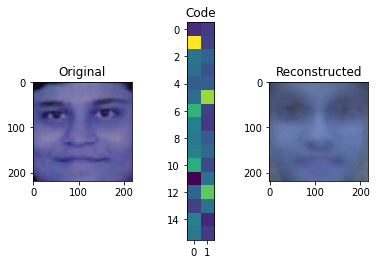

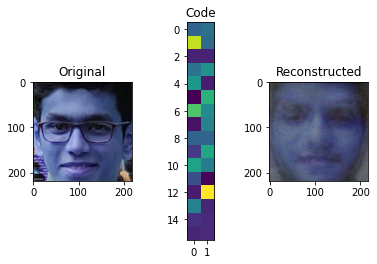

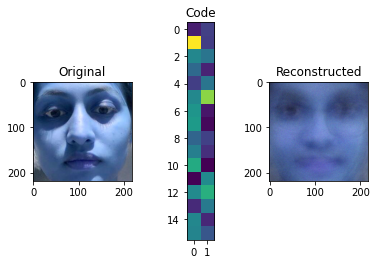

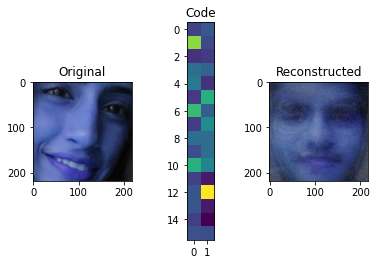

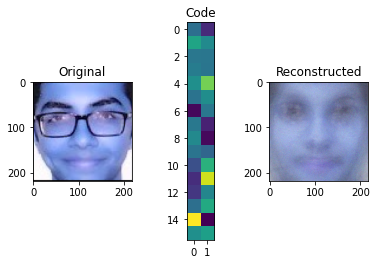

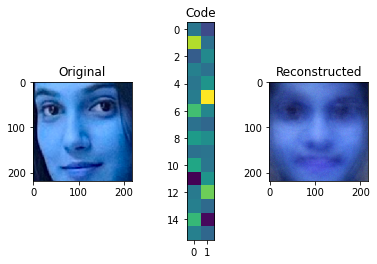

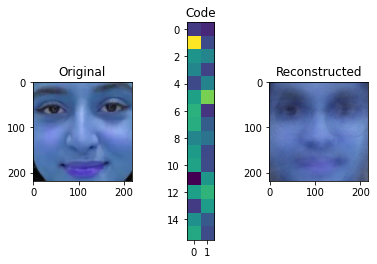

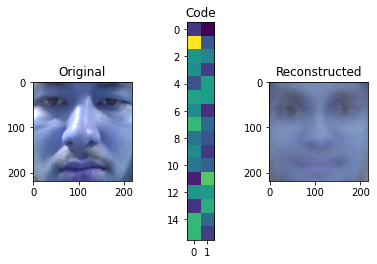

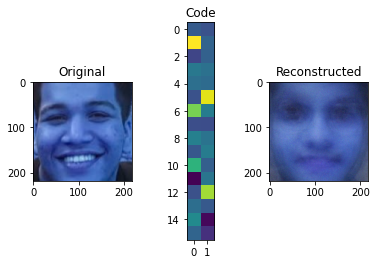

In [71]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    # img[None] will have shape of (1, 32, 32, 3) which is the same as the model input
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
    kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
    image_sharp = cv2.filter2D(reco, -1, kernel)

    plt.subplot(1,3,1)
    plt.title("Original")
    show_image(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    show_image(reco)
    plt.show()
    

for i in range(9):
    img = CX_test[i]
    visualize(img,encoder,decoder)